In [29]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [81]:
import anndata
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import mixture
from typing import Any

<IPython.core.display.Javascript object>

In [7]:
PATH_TO_FOLDER = ""
TRAIN_DATA_PATH = "train"
ORIGINAL_IMAGE_DATA_SUBDIR = "images_masks"
ORIGINAL_MASKS_SUBDIR = "masks"
ORIGINAL_IMAGES_SUBDIR = "img"

if PATH_TO_FOLDER is None:
    raise ValueError("Please set PATH_TO_FOLDER to a path with unzipped training data.")

ANNDATA_PATH = "cell_data.h5ad"
TRAIN_ANNDATA_PATH = os.path.join(TRAIN_DATA_PATH, ANNDATA_PATH)
TRAIN_IMAGE_DATA_DIR = os.path.join(TRAIN_DATA_PATH, ORIGINAL_IMAGE_DATA_SUBDIR)
TRAIN_IMAGE_DATA_IMAGES = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_IMAGES_SUBDIR)
TRAIN_IMAGE_DATA_MASKS = os.path.join(TRAIN_IMAGE_DATA_DIR, ORIGINAL_MASKS_SUBDIR)

<IPython.core.display.Javascript object>

In [94]:
train_anndata = anndata.read_h5ad(TRAIN_ANNDATA_PATH)

<IPython.core.display.Javascript object>

In [87]:
train_anndata.obs.shape

(236791, 39)

<IPython.core.display.Javascript object>

In [9]:
markers = list(train_anndata.var["marker"])

<IPython.core.display.Javascript object>

In [11]:
train_anndata.layers["exprs"].shape

(236791, 40)

<IPython.core.display.Javascript object>

In [17]:
expressions_df = pd.DataFrame(train_anndata.layers["exprs"], columns=markers)

# expressions = expressions_df.to_numpy()

<IPython.core.display.Javascript object>

In [88]:
train_anndata.obs.shape, expressions_df.shape

((236791, 39), (236791, 40))

<IPython.core.display.Javascript object>

In [18]:
def Transform(expressions, scaling_factor=5):
    expressions_transformed = np.arcsinh(expressions) / scaling_factor
    return expressions_transformed

<IPython.core.display.Javascript object>

In [89]:
expressions_df = Transform(expressions_df)

<IPython.core.display.Javascript object>

In [102]:
all_data = pd.concat([train_anndata.obs.reset_index(), expressions_df], axis=1)
all_data.rename(columns={"index": "image_and_obj"}, inplace=True)
# all_data.to_csv("all_data.csv")
all_data

,image_and_obj,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,...,VISTA,CD40,CD4,CD14,Ecad,CD303,CD206,cleavedPARP,DNA1,DNA2
0,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1.0,300.846154,0.692308,13.0,6.094800,2.780135,0.889904,...,0.145316,0.108106,0.255205,0.333582,0.142981,0.000000,0.397552,0.082495,0.452897,0.473978
1,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,3.0,26.982143,0.928571,56.0,21.520654,3.368407,0.987675,...,0.101751,0.114359,0.222709,0.260182,0.278177,0.013764,0.137770,0.023669,0.463631,0.482310
2,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,5.0,309.083333,0.750000,12.0,5.294329,2.862220,0.841267,...,0.087045,0.148526,0.284165,0.391223,0.264534,0.078677,0.309576,0.003028,0.438298,0.455137
3,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,7.0,431.916667,0.750000,12.0,5.294329,2.862220,0.841267,...,0.276497,0.206792,0.313059,0.328830,0.311563,0.038992,0.168605,0.046207,0.405727,0.436062
4,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,8.0,116.931034,1.206897,29.0,9.216670,4.112503,0.894932,...,0.147523,0.070547,0.232782,0.316636,0.320908,0.012306,0.253259,0.072835,0.446475,0.468366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236786,IMMUcan_Batch20220908_S-220729-00002_002.tiff_...,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2713.0,596.548387,596.709677,31.0,6.857501,5.700162,0.555928,...,0.078456,0.030238,0.149778,0.248868,0.225508,0.148622,0.101813,0.006944,0.434539,0.456061
236787,IMMUcan_Batch20220908_S-220729-00002_002.tiff_...,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2715.0,180.300000,597.400000,20.0,6.484816,3.840203,0.805803,...,0.029739,0.013831,0.050736,0.209099,0.203230,0.045691,0.040433,0.000000,0.447563,0.469508
236788,IMMUcan_Batch20220908_S-220729-00002_002.tiff_...,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2721.0,48.370370,598.111111,27.0,10.732613,3.134663,0.956397,...,0.125247,0.084352,0.276656,0.359339,0.230799,0.175528,0.044514,0.020467,0.433142,0.455550
236789,IMMUcan_Batch20220908_S-220729-00002_002.tiff_...,IMMUcan_Batch20220908_S-220729-00002_002.tiff,IMMUcan_Batch20220908_S-220729-00002_002,2722.0,207.969697,598.060606,33.0,12.864691,3.228974,0.967988,...,0.050699,0.019199,0.048461,0.238407,0.145286,0.009493,0.018095,0.016775,0.455402,0.476201


<IPython.core.display.Javascript object>

In [19]:
def CalcMarkerActivationProbability(expressions, markers, random_size):
    # Fit GMM model and get parameters for the activation probabilities
    sigmoid_function_parameter = BuildSigmoidFunction(expressions, markers, random_size)

    # Marker activation probability matrix
    marker_exp_prob = pd.DataFrame()

    for marker in markers:
        exp_term = np.exp(
            sigmoid_function_parameter[marker][1]
            * (expressions_df[marker] - sigmoid_function_parameter[marker][0])
        )
        y = exp_term / (1 + exp_term)
        marker_exp_prob[marker] = (y - min(y)) / (max(y) - min(y))

    return marker_exp_prob

<IPython.core.display.Javascript object>

In [20]:
def BuildSigmoidFunction(expressions, markers, random_size):
    sigmoid_function_parameter = pd.DataFrame()

    # For each marker, fit GMM
    for marker in markers:
        marker_GMM_model = FitGmmModel(marker, expressions[marker], random_size)
        weights = marker_GMM_model.iloc[0, :]
        means = marker_GMM_model.iloc[1, :]
        sigmas = marker_GMM_model.iloc[2, :]

        if means[0] > means[1]:
            a = -0.5 / sigmas[1] + 0.5 / sigmas[0]
            b = means[1] / sigmas[1] - means[0] / sigmas[0]
            c = (
                0.5 * (-means[1] ** 2 / sigmas[1] + means[0] ** 2 / sigmas[0])
                + np.log(weights[1] / weights[0])
                + 0.5 * np.log(sigmas[0] / sigmas[1])
            )
        else:
            a = -0.5 / sigmas[0] + 0.5 / sigmas[1]
            b = means[0] / sigmas[0] - means[1] / sigmas[1]
            c = (
                0.5 * (-means[0] ** 2 / sigmas[0] + means[1] ** 2 / sigmas[1])
                + np.log(weights[0] / weights[1])
                + 0.5 * np.log(sigmas[1] / sigmas[0])
            )

        xroot = (-b - np.sqrt(b**2 - 4 * a * c)) / (2 * a)
        slope = 1

        sigmoid_function_parameter[marker] = [xroot, slope]

    return sigmoid_function_parameter

<IPython.core.display.Javascript object>

In [21]:
def check_means_and_variances(data1, data2):
    # Calculate means and variances
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    variance1 = np.var(data1, ddof=1)  # Use ddof=1 for sample variance
    variance2 = np.var(data2, ddof=1)

    # Perform a t-test for means
    t_statistic, p_value_mean = stats.ttest_ind(data1, data2)

    # Perform an F-test for variances
    f_statistic = variance1 / variance2
    p_value_variance = 2 * min(
        stats.f.cdf(f_statistic, len(data1) - 1, len(data2) - 1),
        1 - stats.f.cdf(f_statistic, len(data1) - 1, len(data2) - 1),
    )

    # Define a significance level (e.g., 0.05)
    alpha = 0.05

    # Compare means
    if (p_value_mean >= alpha) and (p_value_variance >= alpha):
        return 1
    else:
        return 0

<IPython.core.display.Javascript object>

In [23]:
def FitGmmModel(marker_name, marker_exp, random_size):
    gmm_marker_param = pd.DataFrame()

    n_components = 2

    np.random.seed(42)

    zero_indices = np.where(marker_exp == 0)[0]
    zero_percentage = len(zero_indices) / marker_exp.size

    if 0.1 < zero_percentage < 0.2:
        num_of_indices_to_remove = int(np.floor(marker_exp.size * zero_percentage))
    elif 0.2 <= zero_percentage < 0.5:
        num_of_indices_to_remove = int(
            np.floor(marker_exp.size * (zero_percentage - 0.05))
        )
    elif 0.5 <= zero_percentage <= 0.9:
        num_of_indices_to_remove = int(
            np.ceil(marker_exp.size * (zero_percentage - 0.02))
        )
    elif zero_percentage >= 0.9:
        marker_exp = marker_exp[marker_exp != 0]  # Remove all-zero rows
        num_of_indices_to_remove = 0
    else:
        num_of_indices_to_remove = 0

    if num_of_indices_to_remove > 0:
        print(
            f"Warning: The marker ({marker_name}) expression potentially has too many zeros for fitting. GMM fitting will use input expression data with reduced sparsity"
        )
        marker_exp = marker_exp.sample(frac=1).iloc[
            :-num_of_indices_to_remove
        ]  # Randomly remove rows

    sample_size = int(marker_exp.shape[0] * random_size)
    marker_exp = marker_exp.to_numpy()
    marker_exp_random = np.random.choice(marker_exp, size=sample_size, replace=False)

    while not check_means_and_variances(marker_exp, marker_exp_random):
        marker_exp_random = np.random.choice(
            marker_exp, size=sample_size, replace=False
        )

    marker_exp_random = marker_exp_random.reshape(-1, 1)

    # Fit Gaussian Mixture Model
    gmm = mixture.GaussianMixture(n_components=n_components)
    gmm.fit(marker_exp_random)

    # Extract GMM parameters
    proportions = gmm.weights_
    means = gmm.means_
    variances = gmm.covariances_

    # Organize parameters into a matrix
    gmm_marker_param = pd.DataFrame(
        np.vstack((proportions, means.flatten(), variances.flatten()))
    )

    return gmm_marker_param

<IPython.core.display.Javascript object>

In [62]:
for i in range(1, 10)[::-1]:
    random_size = 1 / i
    print(i)
    result = CalcMarkerActivationProbability(
        expressions_df, markers, random_size
    )
    result.to_csv(
        "/raid/immucan/immuw/notebooks/iza/immucan/data/markers_binarization.df"
    )
    print(result)

9
             MPO  HistoneH3       SMA      CD16      CD38     HLADR      CD27  \
0       0.000000   0.685881  0.244652  0.554807  0.244148  0.924176  0.192752   
1       0.065650   0.808151  0.514892  0.240861  0.285569  0.313062  0.200313   
2       0.080129   0.781209  0.605462  0.701930  0.218010  0.961661  0.001716   
3       0.080129   0.474376  0.272920  0.518997  0.243562  0.746373  0.307000   
4       0.066412   0.774601  0.418177  0.237207  0.196670  0.605393  0.046833   
...          ...        ...       ...       ...       ...       ...       ...   
236786  0.108101   0.993291  0.888174  0.829371  0.393549  0.653066  0.687086   
236787  0.072181   0.954972  0.890145  0.330301  0.255583  0.193504  0.264780   
236788  0.053553   0.933741  0.152843  0.867861  0.825803  0.944958  0.620199   
236789  0.072905   0.966996  0.877960  0.375917  0.192372  0.515008  0.191323   
236790  0.234613   0.994476  0.672045  0.816747  0.555020  0.735672  0.791351   

            CD15    CD45R

             MPO  HistoneH3       SMA      CD16      CD38     HLADR      CD27  \
0       0.000000   0.685935  0.244643  0.555000  0.244151  0.924155  0.192814   
1       0.065655   0.808190  0.514880  0.241004  0.285572  0.312996  0.200376   
2       0.080136   0.781252  0.605451  0.702094  0.218013  0.961650  0.001717   
3       0.080136   0.474439  0.272910  0.519192  0.243565  0.746314  0.307084   
4       0.066417   0.774645  0.418166  0.237348  0.196672  0.605320  0.046851   
...          ...        ...       ...       ...       ...       ...       ...   
236786  0.108110   0.993292  0.888170  0.829482  0.393552  0.652996  0.687172   
236787  0.072188   0.954983  0.890141  0.330474  0.255586  0.193456  0.264858   
236788  0.053557   0.933757  0.152837  0.867950  0.825805  0.944942  0.620293   
236789  0.072911   0.967004  0.877955  0.376100  0.192374  0.514931  0.191384   
236790  0.234630   0.994477  0.672034  0.816864  0.555024  0.735612  0.791417   

            CD15    CD45RA 

             MPO  HistoneH3       SMA      CD16      CD38     HLADR      CD27  \
0       0.000000   0.686269  0.244801  0.555193  0.244208  0.924150  0.192786   
1       0.065667   0.808430  0.515094  0.241147  0.285635  0.312980  0.200348   
2       0.080150   0.781517  0.605655  0.702257  0.218065  0.961647  0.001716   
3       0.080150   0.474826  0.273080  0.519387  0.243622  0.746300  0.307046   
4       0.066429   0.774916  0.418374  0.237489  0.196721  0.605302  0.046843   
...          ...        ...       ...       ...       ...       ...       ...   
236786  0.108128   0.993303  0.888254  0.829592  0.393626  0.652979  0.687133   
236787  0.072200   0.955050  0.890224  0.330647  0.255645  0.193445  0.264823   
236788  0.053567   0.933852  0.152947  0.868040  0.825849  0.944938  0.620251   
236789  0.072924   0.967053  0.878046  0.376283  0.192422  0.514913  0.191356   
236790  0.234664   0.994486  0.672223  0.816981  0.555100  0.735598  0.791387   

            CD15    CD45RA 

<IPython.core.display.Javascript object>

In [ ]:
# for i in range(10, 201)[::-10]:
#     random_size = 1 / i
#     print(i)
#     result = CalcMarkerActivationProbability(
#         expressions_transformed, markers, random_size
#     )
#     result.to_csv(
#         "/raid/immucan/immuw/notebooks/iza/immucan/data/markers_binarization.df"
#     )
#     print(result)

In [76]:
import pandas as pd


data = pd.read_csv(
    "/raid/immucan/immuw/notebooks/iza/immucan/data/markers_binarization.df"
).iloc[:, 1:] #delete index


<IPython.core.display.Javascript object>

In [83]:
train_anndata.obs.query('cell_labels == "Neutrophil"')

,image,sample_id,ObjectNumber,Pos_X,Pos_Y,area,major_axis_length,minor_axis_length,eccentricity,width_px,...,flag_tumor,PD1_pos,Ki67_pos,cleavedPARP_pos,GrzB_pos,tumor_patches,distToCells,CD20_patches,Batch,cell_labels
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1884,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1884.0,59.309524,419.547619,42.0,9.204370,5.887512,0.768672,600.0,...,0,0,0,0,0,1,20.809716,,Batch20191023,Neutrophil
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1894,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1894.0,49.333333,422.133333,165.0,16.968112,12.612994,0.668919,600.0,...,0,0,0,0,0,1,20.152629,,Batch20191023,Neutrophil
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_1909,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,1909.0,60.464789,425.563380,71.0,11.532657,8.013082,0.719187,600.0,...,0,0,0,0,0,1,19.182292,,Batch20191023,Neutrophil
IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01-IMC-01_002.tiff_2235,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,IMMUcan_batch20191023_10032145-THOR-VAR-TIS-01...,2235.0,175.470000,493.880000,100.0,12.522105,10.271908,0.571931,600.0,...,0,0,0,0,0,1,13.957323,,Batch20191023,Neutrophil
IMMUcan_Batch20191023_10032401-HN-VAR-TIS-01-IMC-01_003.tiff_1276,IMMUcan_Batch20191023_10032401-HN-VAR-TIS-01-I...,IMMUcan_Batch20191023_10032401-HN-VAR-TIS-01-I...,1276.0,115.966387,212.949580,119.0,14.677682,10.366527,0.707934,530.0,...,0,0,0,0,0,1,9.009830,,Batch20191023,Neutrophil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMMUcan_Batch20220908_S-220513-00020_003.tiff_1471,IMMUcan_Batch20220908_S-220513-00020_003.tiff,IMMUcan_Batch20220908_S-220513-00020_003,1471.0,141.611111,303.861111,36.0,7.345006,6.163535,0.543906,600.0,...,0,0,0,0,0,1,8.331835,,Batch20220908,Neutrophil
IMMUcan_Batch20220908_S-220513-00020_003.tiff_2004,IMMUcan_Batch20220908_S-220513-00020_003.tiff,IMMUcan_Batch20220908_S-220513-00020_003,2004.0,194.000000,421.230769,65.0,11.384070,7.829734,0.725919,600.0,...,0,0,0,0,0,1,14.812070,,Batch20220908,Neutrophil
IMMUcan_Batch20220908_S-220513-00020_003.tiff_2034,IMMUcan_Batch20220908_S-220513-00020_003.tiff,IMMUcan_Batch20220908_S-220513-00020_003,2034.0,187.000000,429.500000,26.0,6.201737,5.203549,0.544059,600.0,...,0,0,0,0,0,1,12.301677,,Batch20220908,Neutrophil
IMMUcan_Batch20220908_S-220715-00002_002.tiff_1134,IMMUcan_Batch20220908_S-220715-00002_002.tiff,IMMUcan_Batch20220908_S-220715-00002_002,1134.0,47.269231,303.019231,104.0,15.367928,8.869110,0.816661,600.0,...,0,0,0,0,0,1,15.889744,,Batch20220908,Neutrophil


<IPython.core.display.Javascript object>

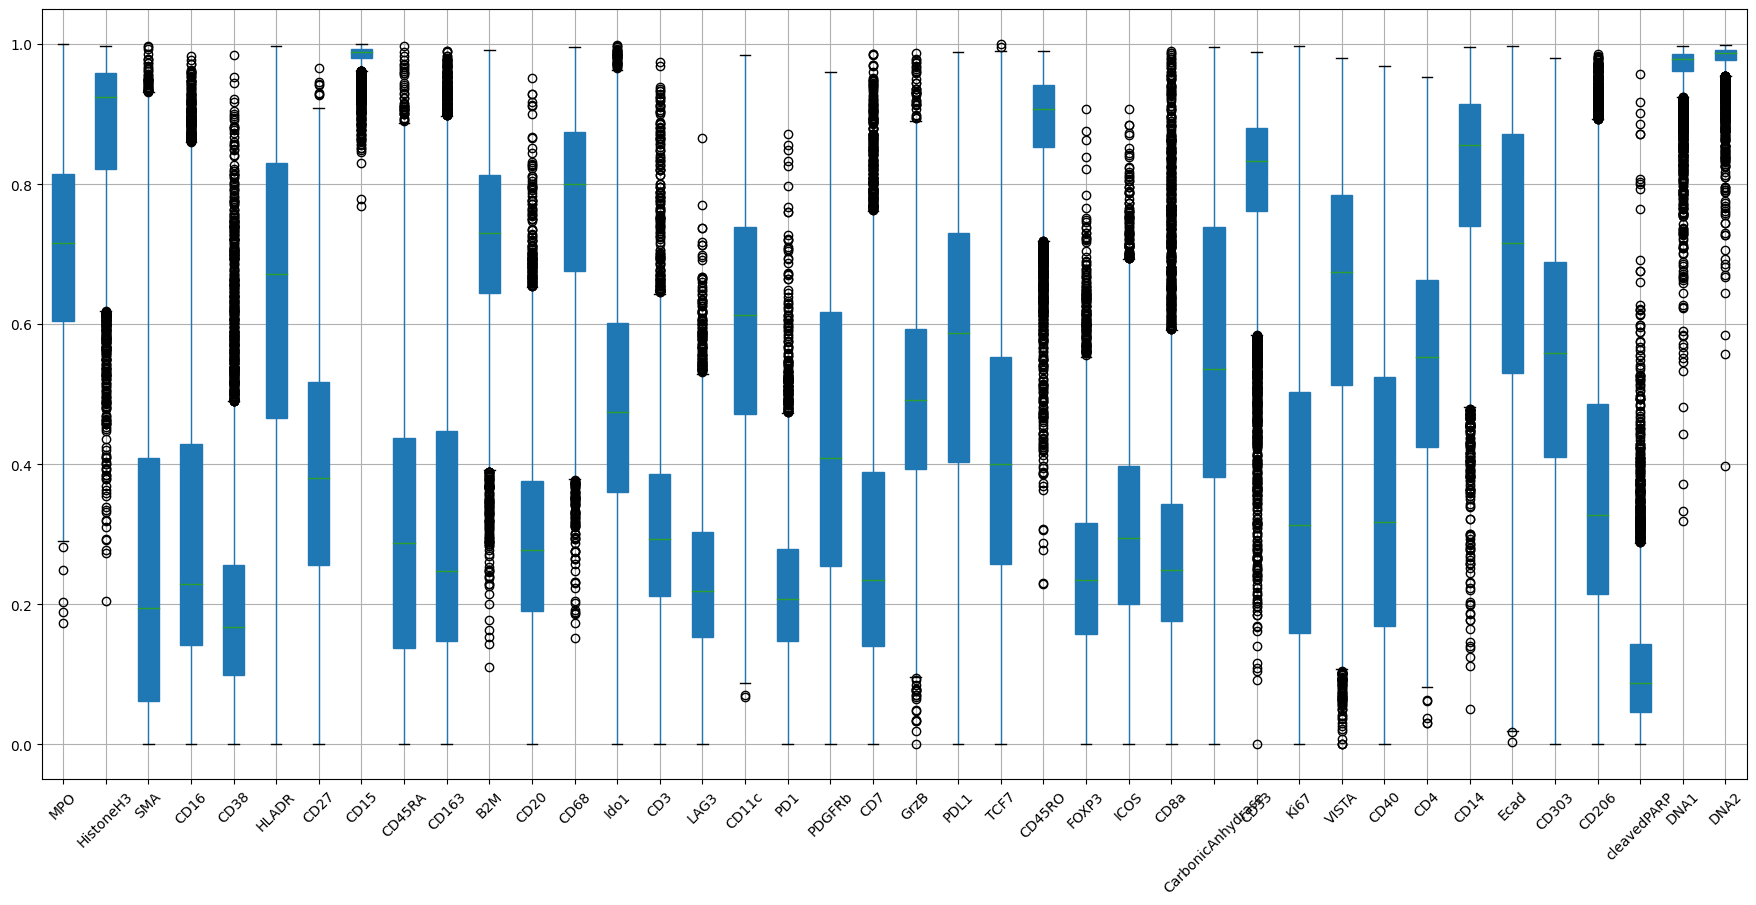

<IPython.core.display.Javascript object>

In [104]:
plt.figure(figsize=(22, 10))
data.iloc[all_data.query('cell_labels == "Neutrophil"').index].boxplot(
    patch_artist=True
)
plt.xticks(rotation=45)
plt.ylim(-0.05, 1.05)
plt.show()

# Other functions

In [42]:
class Celesta:
    def __init__(self, project_name):
        self.project_name: str = project_name
        self.prior_info: pd.DataFrame = None
        self.marker_exp_matrix: np.array = None
        self.original_exp: np.array = None
        self.cell_ID: int = None
        self.lineage_info: pd.DataFrame = None
        self.coords: np.array = None
        self.cell_prob: np.array = None
        self.final_cell_type_assignment: np.array = None
        self.nb_list: np.array = None
        self.total_rounds: int = None
        self.cell_nb_in_bandwidth: Any = None
        self.cell_nb_dist: Any = None
        self.initial_pri_matrix: np.array = None
        self.anchor_cell_type_assignment: np.array = None
        self.dist_from_nearest_assigned_cell: np.array = None
        self.nb_cell_type: Any = None
        # NON-STATIC FIELDS: are updated after initialization
        self.marker_exp_prob: np.array = None
        self.current_scoring_matrix: np.array = None
        self.current_pri_matrix: np.array = None
        self.current_cell_prob: np.array = None
        self.current_cell_type_assignment: np.array = None
        self.starting_cell_type_assignment: np.array = None
        self.current_beta: np.array = None
        self.unassigned_cells: int = None
        self.assigned_cells: int = None

<IPython.core.display.Javascript object>

In [43]:
celesta_obj = Celesta(project_name="check")

<IPython.core.display.Javascript object>

In [48]:
def CreateCelestaObject(
    project_title,
    prior_marker_info,
    imaging_data_file,
    cofactor=10,
    transform_type=1,
    number_of_neighbors=5,
    bandwidth=100,
):
    celesta_obj = Celesta(project_name=project_title)

    print("Geting protein marker expressions")

    # Get protein marker expressions and cell IDs
    cell_ids, original_exp, marker_exp_matrix = GetMarkerExpMatrix(
        prior_marker_info,
        imaging_data_file,
        cofactor=cofactor,
        transform_type=transform_type,
    )
    celesta_obj.cell_ID = cell_ids
    celesta_obj.original_exp = original_exp
    celesta_obj.marker_exp_matrix = marker_exp_matrix

    ##########################################################
    ### Extremely low number of cells will cause issues in Gaussian mixture fitting
    if len(celesta_obj.cell_ID) <= 10:
        print("Warning:")
        print(f"There are only {len(cell_ids)} cells in the sample.")
        print("Extremely small number of cells will cause issues in CELESTA usage.")
        return None
    ##########################################################

    # Get user-defined prior knowledge matrix and cell lineage information
    print("Geting user-defined prior knowledge matrix")

    lineage_info, total_rounds = GetPriorInfo(prior_marker_info)
    celesta_obj.prior_info = prior_marker_info
    celesta_obj.lineage_info = lineage_info
    celesta_obj.total_rounds = total_rounds

    # Get coordinates
    print("Geting coordinates")

    celesta_obj.coords = GetCoords(imaging_data_file)

    # Convert marker expressions to marker activation probability
    print("Converting marker expressions to marker activation probability")

    celesta_obj.marker_exp_prob = CalcMarkerActivationProbability(
        celesta_obj.marker_exp_matrix
    )

    # Get neighboring cell information
    print("Getting neighboring cell information")

    nb_list, all_cell_nb_in_bandwidth, cell_nb_dist = GetNeighborInfo(
        celesta_obj.coords, number_of_neighbors, bandwidth
    )
    celesta_obj.nb_list = nb_list
    celesta_obj.cell_nb_in_bandwidth = all_cell_nb_in_bandwidth
    celesta_obj.cell_nb_dist = cell_nb_dist

    # Initialize the matrices for scoring function and probability matrix
    print("Initializing cell and scoring matrices")

    current_cell_type_assignment, current_scoring_matrix,
    current_cell_prob = InitializeCellAndScoringMatrices(
        celesta_obj.lineage_info, celesta_obj.marker_exp_matrix, celesta_obj.prior_info
    )

    celesta_obj.current_cell_type_assignment = current_cell_type_assignment
    celesta_obj.anchor_cell_type_assignment = current_cell_type_assignment
    celesta_obj.starting_cell_type_assignment = current_cell_type_assignment
    celesta_obj.current_scoring_matrix = current_scoring_matrix
    celesta_obj.current_cell_prob = current_cell_prob

    return celesta_obj

<IPython.core.display.Javascript object>

In [ ]:
def Celesta():
    pass

In [ ]:
def GetMarkerExpMatrix():
    pass

In [ ]:
def GetPriorInfo(prior_marker_info):
    pass

In [ ]:
def GetCoords(imaging_data_file):
    pass

In [ ]:
def GetNeighborInfo():
    pass

In [ ]:
def InitializeCellAndScoringMatrices():
    pass

In [47]:
def FilterCells(celesta_obj, high_marker_threshold=0.9, low_marker_threshold=0.4):
    current_cell_type_assignment = FilterArtifactCells(
        celesta_obj.total_rounds,
        celesta_obj.marker_exp_matrix,
        celesta_obj.marker_exp_prob,
        celesta_obj.current_cell_type_assignment,
        high_marker_threshold,
        low_marker_threshold,
    )
    celesta_obj.starting_cell_type_assignment = current_cell_type_assignment
    celesta_obj.current_cell_type_assignment = current_cell_type_assignment
    return celesta_obj

<IPython.core.display.Javascript object>

In [ ]:
def FilterArtifactCells():
    pass

In [49]:
def AssignCells(celesta_obj,
                        max_iteration = 10,
                        cell_change_threshold = 0.01,
                        min_diff = 0,
                        min_probability = 0,
                        high_expression_threshold_anchor = [0.7] * 50,
                        low_expression_threshold_anchor = [0.9] * 50,
                        high_expression_threshold_index = [0.5] * 50,
                        low_expression_threshold_index = [1] * 50,
                        scale_factor = 5,
                        bandwidth = 100,
                        save_result = True):
    # Cell type assignment should normally finish within 10 minutes for ~100k
    # cells and runs pretty fast for <50k cells
    for roundout in range(celesta_obj.total_rounds):
        celesta_obj.current_cell_type_assignment[:, roundout] =
          celesta_obj.starting_cell_type_assignment[:, roundout]

        current_number_of_cells_changed = []
        lineage_info = celesta_obj.lineage_info

        initial_pri_matrix = GetInitialPriorMatrix(
          lineage_info,
          celesta_obj.prior_info,
          roundout
        )
        celesta_obj.initial_pri_matrix = initial_pri_matrix
        celesta_obj.current_pri_matrix = initial_pri_matrix

        unassigned_cells = FindCellsToCheck(
          celesta_obj.current_cell_type_assignment,
          celesta_obj.lineage_info,
          celesta_obj.cell_ID,
          roundout
        )
        number_of_cells_to_find_identity = len(unassigned_cells)
        
        print(f"Total cells to be assigned in the current round: {number_of_cells_to_find_identity}")

        # Calculate scores using scoring function
        cell_type_num = lineage_info.loc[lineage_info["Round"] == roundout, "Cell_type_number"].values
        celesta_obj.current_scoring_matrix = CalculateScores(
          celesta_obj.marker_exp_prob,
          celesta_obj.current_pri_matrix,
          celesta_obj.current_scoring_matrix,
          roundout,
          unassigned_cells,
          cell_type_num
        )

        # Initialize the cell probability with initial scores
        celesta_obj.current_cell_prob = celesta_obj.current_scoring_matrix.copy()

        # Assign anchor cells
        old_cell_assignment = celesta_obj.current_cell_type_assignment[:, roundout]
        celesta_obj.current_cell_type_assignment[:, roundout] = AssignCellTypes(
          celesta_obj.initial_pri_matrix,
          celesta_obj.current_cell_prob,
          celesta_obj.current_cell_type_assignment,
          celesta_obj.marker_exp_prob,
          cell_type_num,
          unassigned_cells,
          roundout,
          high_marker_threshold = high_expression_threshold_anchor,
          low_marker_threshold = low_expression_threshold_anchor,
          min_difference = min_diff,
          min_prob = min_probability
        )

        celesta_obj.anchor_cell_type_assignment[:, roundout] =
          celesta_obj.current_cell_type_assignment[:, roundout]
        cell_type_count = CountCellType(
          celesta_obj.prior_info,
          celesta_obj.current_cell_type_assignment,
          cell_type_num,
          roundout
        )
        print(cell_type_count)

        if len(cell_type_count[cell_type_count["count"] < 1]) == len(cell_type_num):
            print("Too few cells identified for certain cell type,please consider relaxing threshold.")
            #return(celesta_obj)
            continue

        # Find cells to check
        unassigned_cells = FindCellsToCheck(
          celesta_obj.current_cell_type_assignment,
          celesta_obj.lineage_info,
          celesta_obj.cell_ID,
          roundout
        )
        assigned_cells = FindCellsWithId(
          celesta_obj.current_cell_type_assignment,
          celesta_obj.lineage_info,
          celesta_obj.cell_ID,
          roundout
        )
        if len(unassigned_cells) == 0:
            continue

        # Calculate beta
        celesta_obj.nb_cell_type <- NeighborCellType(
          celesta_obj.nb_list,
          celesta_obj.current_cell_type_assignment,
          cell_type_num,
          roundout,
          unassigned_cells
        )
        celesta_obj.dist_from_nearest_assigned_cell =
          GetDistFromNearestAssignedCells(
            celesta_obj.cell_nb_in_bandwidth,
            celesta_obj.cell_nb_dist,
            celesta_obj.current_cell_type_assignment,
            cell_type_num,
            unassigned_cells,
            assigned_cells,
            roundout
          )
        celesta_obj.current_beta = CalculateBeta(
          celesta_obj.dist_from_nearest_assigned_cell,
          scale_factor,
          bandwidth
        )

        iteration = 1
        current_number_of_cells_changed[iteration] <- 1

        # Iterative cell type assignment
        while (iteration < max_iteration &
          current_number_of_cells_changed[iteration] > cell_change_threshold) {
          iteration <- iteration + 1

          # Calculate cell type probabilities
          celesta_obj@current_cell_prob[:, cell_type_num] <- CalculateIndexCellProb(
            celesta_obj@current_cell_prob,
            celesta_obj@current_cell_type_assignment,
            celesta_obj@current_beta,
            celesta_obj@nb_cell_type,
            celesta_obj@current_scoring_matrix,
            cell_type_num,
            unassigned_cells,
            round
          )

          # Update cell type assignment
          old_cell_assignment <- celesta_obj@current_cell_type_assignment[:, round]
          celesta_obj@current_cell_type_assignment[:, round] <- AssignCellTypes(
            celesta_obj@initial_pri_matrix,
            celesta_obj@current_cell_prob,
            celesta_obj@current_cell_type_assignment,
            celesta_obj@marker_exp_prob,
            cell_type_num,
            unassigned_cells,
            round,
            high_marker_threshold = high_expression_threshold_index,
            low_marker_threshold = low_expression_threshold_index,
            min_difference = min_diff,
            min_prob = min_probability
          )
          cell_type_count <- CountCellType(
            celesta_obj@prior_info,
            celesta_obj@current_cell_type_assignment,
            cell_type_num,
            round
          )
          print(cell_type_count)

          current_number_of_cells_changed[iteration] <-
            length(which((old_cell_assignment -
              celesta_obj@current_cell_type_assignment[:, round]) != 0)) /
              number_of_cells_to_find_identity
          print(paste0("Proportion of cells changed assignment in the last iteration: ",current_number_of_cells_changed[iteration]))
          if (current_number_of_cells_changed[iteration] < cell_change_threshold) {
            break
          }

          # Find cells to check
          unassigned_cells <- FindCellsToCheck(
            celesta_obj@current_cell_type_assignment,
            celesta_obj@lineage_info,
            celesta_obj@cell_ID,
            round
          )
          assigned_cells <- FindCellsWithId(
            celesta_obj@current_cell_type_assignment,
            celesta_obj@lineage_info,
            celesta_obj@cell_ID,
            round
          )
          if (length(unassigned_cells) == 0) {
            break
          }

          # Calculate beta
          celesta_obj@nb_cell_type <- NeighborCellType(
            celesta_obj@nb_list,
            celesta_obj@current_cell_type_assignment,
            cell_type_num,
            round,
            unassigned_cells
          )
          celesta_obj@dist_from_nearest_assigned_cell <-
            GetDistFromNearestAssignedCells(
              celesta_obj@cell_nb_in_bandwidth,
              celesta_obj@cell_nb_dist,
              celesta_obj@current_cell_type_assignment,
              cell_type_num,
              unassigned_cells,
              assigned_cells,
              round
            )
          celesta_obj@current_beta <- CalculateBeta(
            celesta_obj@dist_from_nearest_assigned_cell,
            scale_factor,
            bandwidth
          )

          # Update prior cell-type marker matrix
          celesta_obj@current_pri_matrix <- UpdatePriorMatrix(
            celesta_obj@current_pri_matrix,
            celesta_obj@initial_pri_matrix,
            celesta_obj@current_cell_type_assignment,
            celesta_obj@marker_exp_prob,
            round,
            cell_type_num
          )
          # Update scoring function
          celesta_obj@current_scoring_matrix <- CalculateScores(
            celesta_obj@marker_exp_prob,
            celesta_obj@current_pri_matrix,
            celesta_obj@current_scoring_matrix,
            round,
            unassigned_cells,
            cell_type_num
          )
        } ### while loop for the iterations in the current round

    if (!is.null(progress)) {
      currValue <- progress$getValue()
      value <- 100 / celesta_obj@total_rounds
      detail <- ifelse(round == celesta_obj@total_rounds, "Assignment complete",
        paste0(
          "Round ",
          round + 1,
          "/",
          celesta_obj@total_rounds
        )
      )
      progress$set(
        value = currValue + value,
        detail = detail
      )
    }
    } ### Round for loop
    celesta_obj@final_cell_type_assignment <- GetFinalInferredCellTypes(
    celesta_obj@project_name,
    celesta_obj@total_rounds,
    celesta_obj@current_cell_type_assignment,
    celesta_obj@anchor_cell_type_assignment,
    celesta_obj@prior_info,
    celesta_obj@lineage_info,
    celesta_obj@coords, 
    celesta_obj@original_exp,
    save_result = save_result
    )

    if (dim(celesta_obj@final_cell_type_assignment)[2] == 0) {
    print("No cells were assigned. Please adjust the CELESTA paramters.")
    }
    return(celesta_obj)
    }

SyntaxError: invalid syntax (2753895636.py, line 12)

ERROR:root:Cannot parse: 12:44:                         save_result = True) {
Traceback (most recent call last):
  File "/home/ifedorczyk/immucan/lib/python3.8/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/home/ifedorczyk/immucan/lib/python3.8/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1079, in format_str
  File "src/black/__init__.py", line 1089, in _format_str_once
  File "src/black/parsing.py", line 127, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 12:44:                         save_result = True) {


In [ ]:
def GetInitialPriorMatrix():
    pass

In [ ]:
def FindCellsToCheck():
    pass

In [ ]:
def CalculateScores():
    pass

In [ ]:
def AssignCellTypes():
    pass

In [58]:
def CountCellType(prior_info, current_cell_type_assignment, cell_type_num, roundout):
    # Initialize cell_type_count as a DataFrame with the desired dimensions
    cell_type_count = pd.DataFrame(index=range(len(cell_type_num)), columns=["cell_type_number", "count", "proportion"])

    # Set the cell_type_number column
    cell_type_count["cell_type_number"] = cell_type_num

    # Set the row names
    cell_type_count.index = prior_info.iloc[cell_type_num, 0]

    # Calculate the count for each cell type
    for i in range(len(cell_type_num)):
        cell_type_count.iloc[i, 1] = np.sum(current_cell_type_assignment[:, roundout] == cell_type_num[i])
        cell_type = prior_info.iloc[cell_type_num[i], 0]
        if cell_type_count.iloc[i, 1] < 1:
            print(f"Too few cells identified for: {cell_type}")
            print("Please consider relaxing the threshold.")

    # Calculate the proportion
    total_cell_number = current_cell_type_assignment.shape[0]
    cell_type_count["proportion"] = cell_type_count["count"] / total_cell_number

    return cell_type_count


<IPython.core.display.Javascript object>

In [61]:
def FindCellsToCheck():
    pass

SyntaxError: invalid syntax (4285943226.py, line 1)

ERROR:root:Cannot parse: 1:18: train_anndata.obs[, 1]
Traceback (most recent call last):
  File "/home/ifedorczyk/immucan/lib/python3.8/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/home/ifedorczyk/immucan/lib/python3.8/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src/black/__init__.py", line 1079, in format_str
  File "src/black/__init__.py", line 1089, in _format_str_once
  File "src/black/parsing.py", line 127, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 1:18: train_anndata.obs[, 1]


In [ ]:
def FindCellsWithId():
    pass

In [ ]:
def GetDistFromNearestAssignedCells():
    pass

In [ ]:
def CalculateBeta():
    pass

# OTHER OTHER

In [66]:
def update_prior_matrix(current_pri_matrix, initial_pri_matrix, current_cell_type_assignment,
                        marker_exp_prob, current_round, cell_type_num):
    updated_prior_matrix = current_pri_matrix.copy()
    num_cell_types = len(cell_type_num)
    num_markers = current_pri_matrix.shape[1]

    for i in range(num_cell_types):
        cell_type_to_check = cell_type_num[i]
        cells_of_current_cell_type = np.where(current_cell_type_assignment[:, current_round] == cell_type_to_check)[0]

        for j in range(num_markers):
            marker_mean_exp_prob = np.mean(marker_exp_prob[cells_of_current_cell_type, j])
            updated_prior_matrix[i, j] = (marker_mean_exp_prob + initial_pri_matrix[i, j]) / 2

    return updated_prior_matrix


<IPython.core.display.Javascript object>

In [65]:
def get_final_inferred_cell_types(project_name, total_rounds, current_cell_type_assignment,
                                  anchor_cell_type_assignment, prior_info, lineage_info, coords,
                                  original_exp, save_result=True):
    cell_type_name_assigned = np.empty_like(current_cell_type_assignment, dtype='object')
    anchor_cell_type_name_assigned = np.empty_like(current_cell_type_assignment, dtype='object')
    final_cell_type_assignment = np.zeros(current_cell_type_assignment.shape[0], dtype=int)

    for i in range(total_rounds):
        current_pri_matrix_num = i + 1
        cell_type_name_assigned[:, i] = prior_info.loc[
            prior_info['Cell_type_number'].isin(current_cell_type_assignment[:, i]), 'X'
        ].values
        cell_type_name_assigned[current_cell_type_assignment[:, i] == 0, i] = "Unknown"

        anchor_cell_type_name_assigned[:, i] = prior_info.loc[
            prior_info['Cell_type_number'].isin(anchor_cell_type_assignment[:, i]), 'X'
        ].values
        anchor_cell_type_name_assigned[anchor_cell_type_assignment[:, i] == 0, i] = "Unknown"

        if current_pri_matrix_num == 1:
            final_cell_type_assignment = current_cell_type_assignment[:, current_pri_matrix_num - 1]
        else:
            previous_level_type = np.unique(
                lineage_info.loc[lineage_info['Round'] == current_pri_matrix_num, 'Previous_cell_type']
            )
            assignment = current_cell_type_assignment[
                (final_cell_type_assignment == previous_level_type) &
                (current_cell_type_assignment[:, current_pri_matrix_num - 1] != 0),
                current_pri_matrix_num - 1
            ]
            final_cell_type_assignment[
                (final_cell_type_assignment == previous_level_type) &
                (current_cell_type_assignment[:, current_pri_matrix_num - 1] != 0)
            ] = assignment

    final_cell_names = prior_info.loc[
        prior_info['Cell_type_number'].isin(final_cell_type_assignment), 'X'
    ].values
    final_cell_names[final_cell_type_assignment == 0] = "Unknown"

    final_result = np.column_stack((
        cell_type_name_assigned,
        final_cell_type_assignment,
        final_cell_names
    ))
    round_name = [f"Round {i}" for i in range(1, total_rounds + 1)]
    col_names = round_name + ["Cell type number", "Final cell type"]
    final_result = pd.DataFrame(final_result, columns=col_names)

    if save_result:
        filename = f"{project_name}_final_cell_type_assignment.csv"
        pd.concat([final_result, coords, original_exp], axis=1).to_csv(filename, index=False)

    return final_result


<IPython.core.display.Javascript object>